In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
tf.__version__

'2.12.0'

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 740s 4us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
def plot_image(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

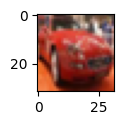

In [18]:
plot_image(5)

In [19]:
y_train[5]

array([1], dtype=uint8)

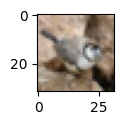

In [20]:
plot_image(90)

In [23]:
y_train[90]

array([2], dtype=uint8)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [27]:
classes[y_train[90][0]]

'bird'

In [28]:
xtrainscaled = X_train/255
xtestscaled = X_test/255

In [29]:
ytrain_categorical = keras.utils.to_categorical(y_train,10)
ytest_categorical = keras.utils.to_categorical(y_test,10)

In [30]:
ytest_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [33]:
model = keras.Sequential(
                [
                    keras.layers.Flatten(input_shape=(32,32,3)),
                    keras.layers.Dense(3000,activation = 'relu'),
                    keras.layers.Dense(1000,activation = 'relu'),
                    keras.layers.Dense(100,activation = 'relu'),
                    keras.layers.Dense(10,activation = 'sigmoid'),
                ]
)

model.compile(
                optimizer='SGD',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

model.fit(xtrainedscaled,ytrain_categorical,epochs=1)

1563/1563 [==============================] - 161s 102ms/step - loss: 1.8272 - accuracy: 0.3432


In [37]:
np.argmax(model.predict(xtestscaled)[9])

313/313 [==============================] - 9s 28ms/step


1

In [38]:
ytest_categorical[9]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)